In [1]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 
    'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
    'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315_of_diluted_wines', 
    'Proline'
]
df = pd.read_csv(url, names=column_names)


In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Determine the optimal number of components
n_components = len(explained_variance_ratio)
for i in range(n_components):
    if cumulative_explained_variance[i] >= 0.95:  # 95% variance explained
        optimal_n_components = i + 1
        break

print(f"Optimal number of components: {optimal_n_components}")


Optimal number of components: 10


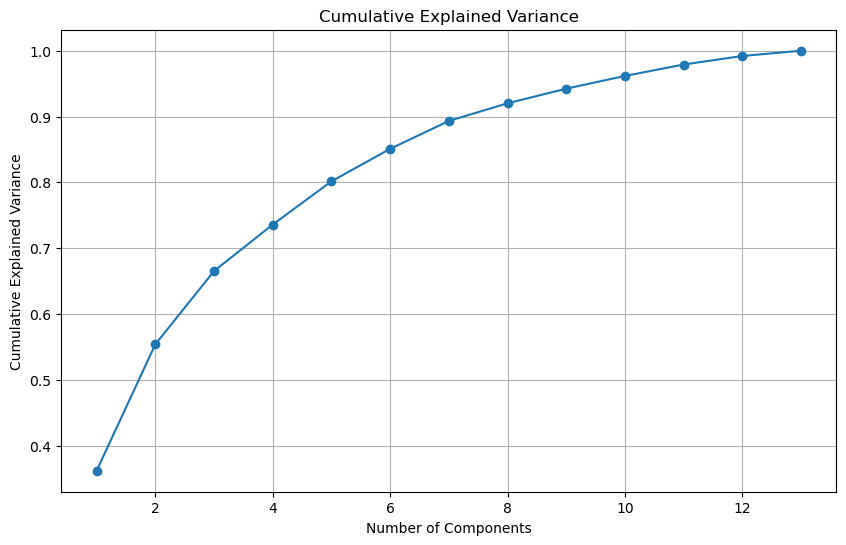

In [4]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [5]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as necessary
clusters = kmeans.fit_predict(X_pca[:, :optimal_n_components])

# Add clusters to the DataFrame
df['Cluster'] = clusters


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


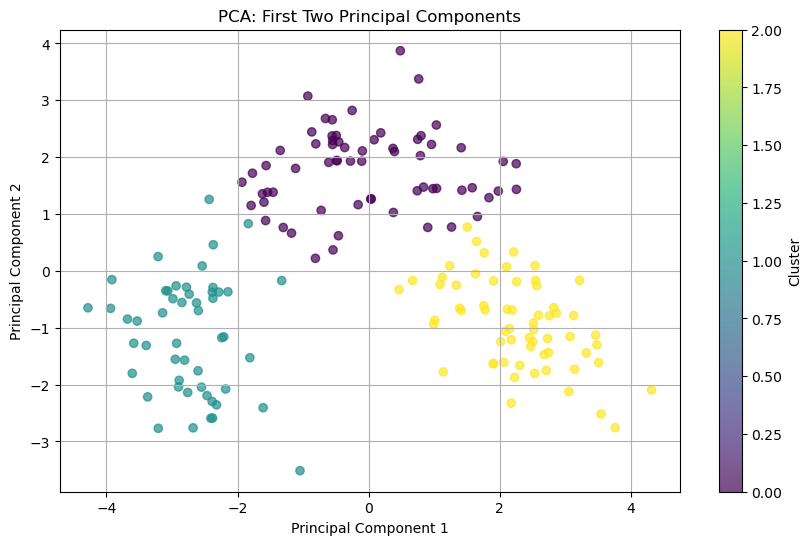

In [6]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

# Performance metrics
silhouette_avg = silhouette_score(X_pca[:, :optimal_n_components], clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Create a table for performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Silhouette Score'],
    'Value': [silhouette_avg]
})
print(performance_metrics)


Silhouette Score: 0.2986748294369291
             Metric     Value
0  Silhouette Score  0.298675
